<a href="https://colab.research.google.com/github/SantiagoGamez/SemanaTecTC1002S.103/blob/main/6.4_Actividad_Regresion_Linea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad
(Haz doble clic en esta celda y completa los datos correspondientes a tu equipo)

- Santiago Gamez A01197653

# Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

# Nota: 
Esta actividad se evaluará de acuerdo a la rúbrica en Canvas.

Al integrante que no participe en la actividad no se le tomará en cuenta para la calificación.

El límite para entregar las actividades es el viernes antes de las 23:59.

# Importante: 
- Colocar nombre en ejes en gráficas
- Nombre en gráficas 
- Conclusiones con el nombre de cada alumno
- Contestar cada pregunta


**Gastos en seguro**

Nuestro objetivo será construir un modelo que nos permita estimar los gastos de seguro dependiendo de edad,sexo, indice de masa corporal, numero de hijos, si se fuma, región.

El dataset consta de las columnas: 
- age: edad del beneficiario principal
- sex: female o male 
- bmi: indice de masa corporal
- children: numero de niños que estan cubiertos con la poliza. 
- smoke: si fuma el beneficiario si/no
- region: región en dónde vive el beneficiario. Estos datos son de Estados Unidos. Regiones disponibles: northeast, southeast, southwest, northwest
- charges: costo del seguro.


Referencia de dataset: 
https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

1.a. Carga los datos del archivo insurance.csv 

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.express as px

dataframei = pd.read_csv("/gdrive/MyDrive/TC1002S/arte-analitica/data/insurance.csv")

1.b. Crea unas columnas con las siguientes caracteristicas:
- fuma: 1 si el bvalor de smoke es "yes" y 0 si el valor de smoke es "no" 
- region: si es northeast - 0 , southeast- 1, southwest- 2, northwest - 3
- sexo: 0 si es "male" y 1 si es "female"

In [72]:
dataframei_smoker = pd.get_dummies(dataframei['smoker'])
dataframei_region = {'northeast': 0, 'southeast': 1, 'southwest': 2, 'northwest': 3}
dataframei_region = dataframei['region'].map(dataframei_region)
dataframei_gender = pd.get_dummies(dataframei['sex'])

print(dataframei_smoker.head)
print(dataframei_region.head)
print(dataframei_gender.head)

<bound method NDFrame.head of       no  yes
0      0    1
1      1    0
2      1    0
3      1    0
4      1    0
...   ..  ...
1333   1    0
1334   1    0
1335   1    0
1336   1    0
1337   0    1

[1338 rows x 2 columns]>
<bound method NDFrame.head of 0       2
1       1
2       1
3       3
4       3
       ..
1333    3
1334    0
1335    1
1336    2
1337    3
Name: region, Length: 1338, dtype: int64>
<bound method NDFrame.head of       female  male
0          1     0
1          0     1
2          0     1
3          0     1
4          0     1
...      ...   ...
1333       0     1
1334       1     0
1335       1     0
1336       1     0
1337       1     0

[1338 rows x 2 columns]>


2. Generar una(s) grafica(s) para visuaizar cómo se relaciona cada columna de costo en seguro contra otras variables.

Text(0, 0.5, 'Charges')

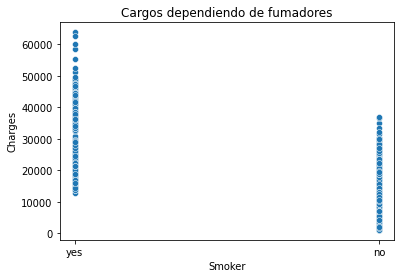

In [43]:
sns.scatterplot(data=dataframei, x = 'smoker', y='charges')
plt.title('Cargos dependiendo de fumadores')
plt.xlabel('Smoker')
plt.ylabel('Charges')

Text(0, 0.5, 'Charges')

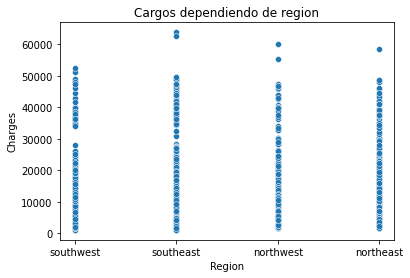

In [44]:
sns.scatterplot(data=dataframei, x = 'region', y='charges')
plt.title('Cargos dependiendo de region')
plt.xlabel('Region')
plt.ylabel('Charges')

Text(0, 0.5, 'Charges')

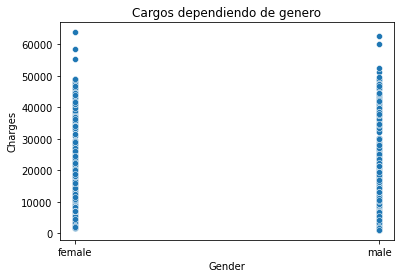

In [45]:
sns.scatterplot(data=dataframei, x = 'sex', y='charges')
plt.title('Cargos dependiendo de genero')
plt.xlabel('Gender')
plt.ylabel('Charges')

Text(0, 0.5, 'Charges')

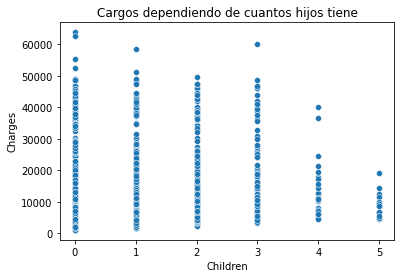

In [46]:
sns.scatterplot(data=dataframei, x = 'children', y='charges')
plt.title('Cargos dependiendo de cuantos hijos tiene')
plt.xlabel('Children')
plt.ylabel('Charges')

3. ¿ Qué conclusiones puedes obtener de las graficas anteriores?

In [41]:
#1. Hay mayor costo para gente que fuma
#2. Aunque no sea mucha diferencia, hay mayor costo para gente southeast
#3. No hay gran diferencia de costo por genero
#4. Tiende a tener mayor cargo de seguro mientras menos hijos tiene

4. **Regresión lineal**. En su forma más simple, consiste en asumir que una variable $x$ y una variable $y$ presentan una relación lineal de la forma:

$$ y \approx \beta_0 + \beta_1 \cdot x$$

¿Cuál es el valor de beta_0 , beta_1 y el Score  para **Edad vs Costo** , **Indice de masa corporal vs Costo** , **Niños vs Costo** y otros?

In [54]:
N = dataframei["charges"].sum()

u_x = np.mean(dataframei["charges"])
u_y = np.mean(dataframei["age"])

X = dataframei["charges"]
Y = dataframei["age"]
varx = np.var(X)
varxy = np.sum((X - u_x) * (Y - u_y)) / N
b0 = varxy / varx
b1 = u_y - b0 * u_x

print("Valores b0 y b1 de edad vs costo:")
print("Parameter bo = " + str(b0))
print("Parameter b1 = " + str(b1))

Valores b0 y b1 de edad vs costo:
Parameter bo = 2.6141403461089987e-08
Parameter b1 = 39.20667850359876


In [55]:
N = dataframei["charges"].sum()

u_x = np.mean(dataframei["charges"])
u_y = np.mean(dataframei["bmi"])

X = dataframei["charges"]
Y = dataframei["bmi"]
varx = np.var(X)
varxy = np.sum((X - u_x) * (Y - u_y)) / N
b0 = varxy / varx
b1 = u_y - b0 * u_x

print("Valores b0 y b1 de bmi vs costo:")
print("Parameter bo = " + str(b0))
print("Parameter b1 = " + str(b1))

Valores b0 y b1 de bmi vs costo:
Parameter bo = 7.526340689917808e-09
Parameter b1 = 30.663296983267482


In [56]:
N = dataframei["charges"].sum()

u_x = np.mean(dataframei["charges"])
u_y = np.mean(dataframei["children"])

X = dataframei["charges"]
Y = dataframei["children"]
varx = np.var(X)
varxy = np.sum((X - u_x) * (Y - u_y)) / N
b0 = varxy / varx
b1 = u_y - b0 * u_x

print("Valores b0 y b1 de Niños vs costo:")
print("Parameter bo = " + str(b0))
print("Parameter b1 = " + str(b1))

Valores b0 y b1 de Niños vs costo:
Parameter bo = 5.100736615861623e-10
Parameter b1 = 1.0949110188500244


Score:


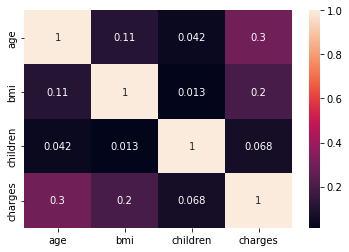

In [62]:
print("Score:")
plt.figure()
sns.heatmap(dataframei.corr(), annot = True)

5. ¿Cuál de los modelos es mejor de acuerdo al score ordenalos del mejor al peor?

*Escibe aquí...*.
- Charges vs age
- Charges vs bmi
- Charges vs children

6.  **Regresión lineal múltiple**. Como ahora vamos a incluir más de una variable, el modelo se rescribe a :

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_1 + \hat{\beta}_2 \cdot x_2 + \hat{\beta}_3\cdot x_3 + \ldots \epsilon $$

Elige  las diferentes combinaciones de variables. Ejemplo: Redes y Youtube vs Ventas 

¿Cuál es el valor de beta_0, betas_1 , beta_2 , el score y el score ajustado de de 5 combinaciones . Ejemplo: **Edad, Niños, Region vs Costo** ?

 7. ¿Cuál modelo es el que nos conviene elegir?

*Escibe aquí...*.

# ¿Cuál es la ecuación final de tu modelo?

Escribe aquí...

# Conclusiones

Escribe aquí...

##a01197653- Santiago Gamez##
    Durante esta semana tec, pude ver como la programacion es una gran heramienta para el analisis de datos, ya que simplifica mucho el trabajo 
    requerido para poder acceder, procesar y relacionar grandes cantidades de datos en un periodo corto de tiempo y sin mucho esfuerzo. De igual 
    manera, aprendi de nuevas herramientas, como google colab, que no habia tenido la oportunidad de conocer anteriormente, y renforce conocimientos 
    y practica de github

# Guardar el resultado como pdf


* Escribe aquí abajo la liga de tu repositorio.

* (Haz doble clic en esta celda y copia la URL dentro del paréntesis)

[Liga al repositorio de Santiago Gamez](https://github.com/SantiagoGamez/SemanaTecTC1002S.103)

* Exporta el notebook a formato HTML.

In [ ]:
! jupyter nbconvert --to HTML '/content/drive/MyDrive/SemanaTec/arte-analitica/6.3 - Actividad Regresion Linea.ipynb'

* Haz doble clic en el archivo nuevo que se creó dentro de la carpeta `arte-analitica` y en la parte superior derecha dale clic en **imprimir**

* Imprime el archivo como *PDF* y súbelo a Canvas.